In [14]:
#%pip install biolearn
#%pip install scikit-learn
#%pip install matplotlib
#%pip install xgboost
#%pip install yellowbrick
#%pip install tensorflow


     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/377.0 MB 3.2 MB/s eta 0:02:00
   ---------------------------------------- 0.4/377.0 MB 2.9 MB/s eta 0:02:12
   ---------------------------------------- 0.5/377.0 MB 2.7 MB/s eta 0:02:21
   ---------------------------------------- 0.6/377.0 MB 2.7 MB/s eta 0:02:22
   ---------------------------------------- 0.7/377.0 MB 2.6 MB/s eta 0:02:26
   ---------------------------------------- 0.8/377.0 MB 2.6 MB/s eta 0:02:24
   ---------------------------------------- 0.9/377.0 MB 2.6 MB/s eta 0:02:26
   ---------------------------------------- 1.1/377.0 MB 2.6 MB/s eta 0:02:22
   ---------------------------------------- 1.2/377.0 MB 2.6 MB/s eta 0:02:24
   

In [1]:
from biolearn.data_library import DataLibrary

In [2]:
import pandas as pd

#Download the data file for the warmup challenge linked here https://www.synapse.org/#!Synapse:syn52966292/wiki/625231
DOWNLOADED_DATA_FILE_PATH="warmup_challenge_methylation/challenge_data.csv"
challenge_data = pd.read_csv(DOWNLOADED_DATA_FILE_PATH, index_col=0)
challenge_data

from biolearn.data_library import DataLibrary
data = DataLibrary().get("GSE40279").load()
data.metadata


,age,sex,ethnicity,tissue
id,,,,
GSM989827,67.0,1,Caucasian - European,whole blood
GSM989828,89.0,1,Caucasian - European,whole blood
GSM989829,66.0,1,Caucasian - European,whole blood
GSM989830,64.0,1,Caucasian - European,whole blood
GSM989831,62.0,1,Caucasian - European,whole blood
...,...,...,...,...
GSM990623,78.0,1,Caucasian - European,whole blood
GSM990624,71.0,2,Caucasian - European,whole blood
GSM990625,68.0,2,Caucasian - European,whole blood


In [3]:
from sklearn.utils import shuffle
import numpy as np
X = data.dnam.transpose()
X_df = pd.DataFrame(X)
y = data.metadata['age']
y_df = pd.DataFrame(y)



In [55]:
data.dnam.transpose()

id,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,ch.9.945770F,ch.9.96055087R,ch.9.97139671F,ch.9.98463211R,ch.9.98936572R,ch.9.98937537R,ch.9.98957343R,ch.9.98959675F,ch.9.98989607R,ch.9.991104F
GSM989827,0.464197,0.941091,0.911182,0.132014,0.717861,0.686521,0.805003,0.228244,0.338483,0.016508,...,0.022659,0.109918,0.061222,0.034284,0.133692,0.042808,0.052589,0.035624,0.028066,0.043850
GSM989828,0.454883,0.939033,0.596455,0.206917,0.723935,0.619084,0.814672,0.310879,0.418998,0.005747,...,0.005095,0.076996,0.052640,0.027978,0.125270,0.036811,0.053343,0.075618,0.017428,0.032950
GSM989829,0.485764,0.918802,0.870333,0.162861,0.719196,0.635678,0.824336,0.263215,0.424736,0.012197,...,0.021444,0.070694,0.058888,0.032643,0.139105,0.042844,0.045973,0.126421,0.021752,0.022375
GSM989830,0.480785,0.929908,0.889689,0.197780,0.704061,0.610864,0.811152,0.316761,0.398772,0.019945,...,0.028587,0.094749,0.056279,0.036997,0.140601,0.042258,0.048733,0.084051,0.027504,0.053007
GSM989831,0.501220,0.934548,0.890450,0.148437,0.754913,0.651262,0.808628,0.338289,0.366965,0.000000,...,0.018626,0.110543,0.057568,0.036746,0.129993,0.039613,0.039254,0.165874,0.020889,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM990623,0.527496,0.958173,0.922034,0.223068,0.778959,0.709248,0.825768,0.354296,0.396241,0.001778,...,0.016319,0.079741,0.072076,0.052052,0.159212,0.049571,0.033060,0.093414,0.013654,0.014088
GSM990624,0.588331,0.982450,0.855145,0.162180,0.796868,0.535832,0.806713,0.295598,0.301319,0.006685,...,0.023837,0.117762,0.058466,0.037199,0.133899,0.055904,0.062442,0.101100,0.014193,0.000000
GSM990625,0.362994,0.954392,0.927184,0.196430,0.713020,0.664184,0.804045,0.395724,0.445179,0.003822,...,0.012054,0.079249,0.053499,0.050002,0.149589,0.048526,0.041087,0.049857,0.016840,0.041415
GSM990626,0.499145,0.931690,0.900938,0.167477,0.730215,0.665792,0.831365,0.338117,0.383953,0.000000,...,0.009878,0.090751,0.060335,0.040898,0.168269,0.056429,0.047835,0.028896,0.025346,0.052959


In [73]:
print(data.dnam.transpose().columns[2])

cg00000109


In [57]:
X_df = np.array(X_df)
X_df
new_x=X_df[:,]
new_x


array([0.971575 , 0.9328934, 0.9450683, 0.9456399, 0.9292319, 0.9782088,
       0.9643462, 0.9123458, 0.9476592, 0.9082863, 0.9158353, 0.9133902,
       0.9605255, 0.9592386, 0.9634284, 0.9466538, 0.9401496, 0.9548854,
       0.9441524, 0.940608 , 0.9581089, 0.9564009, 0.9677281, 0.9237445,
       0.9509742, 0.9445162, 0.9426915, 0.9314725, 0.9588487, 0.9218781,
       0.9420541, 0.9779165, 0.9499301, 0.9720705, 0.9347101, 0.937611 ,
       0.9059702, 0.9236419, 0.9752337, 0.9156689, 0.9549747, 0.9217923,
       0.9615367, 0.9279873, 0.9510353, 0.9723532, 0.9105682, 0.9510443,
       0.9124448, 0.9249066, 0.9439761, 0.9583457, 0.9771527, 0.913228 ,
       0.945657 , 0.9063175, 0.9074803, 0.9690466, 0.9377172, 0.940681 ,
       0.9327926, 0.9374164, 0.9092603, 0.9409479, 0.9350522, 0.9120938,
       0.9201396, 0.9388933, 0.9459314, 0.9567454, 0.9592919, 0.9576495,
       0.9764483, 0.9580459, 0.918498 , 0.9281898, 0.9477629, 0.9550184,
       0.9475276, 0.9008276, 0.8886966, 0.9539087, 

In [8]:

cb= pd.concat([X_df, y_df], axis=1)
#cb.head()
cb.head()
choose = cb[['cg09809672', 'cg22736354', 'cg02228185', 'cg01820374', 'cg06493994', \
             'cg19761273','cg00000289','cg00009038','cg00035074','cg00008033','cg00000029',\
                 'cg00000165','cg00000236','cg00034130','cg00000109','age']]

choose= shuffle(choose)
# Drop all rows with NaN values
choose = choose.dropna()

# Reset Index
choose.reset_index(inplace=True, drop=True)

choose.head()


,cg09809672,cg22736354,cg02228185,cg01820374,cg06493994,cg19761273,age
0,0.398597,0.351708,0.726464,0.304794,0.272213,0.261336,70.0
1,0.316259,0.310846,0.678990,0.254861,0.251937,0.219241,72.0
2,0.466255,0.261178,0.735868,0.264928,0.232397,0.248534,54.0
3,0.479040,0.357327,0.731588,0.248796,0.255080,0.309087,56.0
4,0.454445,0.311552,0.674955,0.295164,0.262740,0.279150,70.0


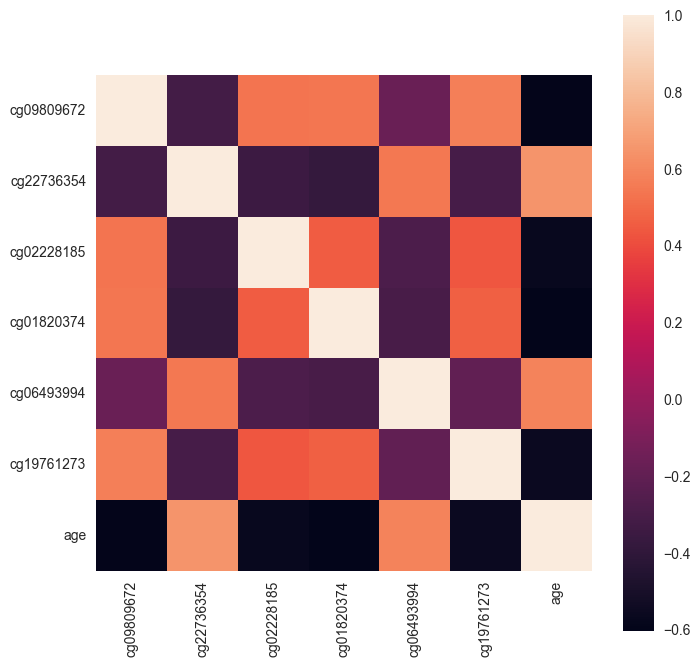

In [9]:
import matplotlib.pyplot as plt
from yellowbrick.regressor import ResidualsPlot
import seaborn as sb

C_mat = choose.corr()
fig = plt.figure(figsize = (8,8))

sb.heatmap(C_mat, vmax=1, square=True)
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
std_scaler = StandardScaler()
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

# Normalizing the methylation and sex data with a Standard Scaler.
X = choose[['cg09809672', 'cg22736354', 'cg02228185', 'cg01820374', 'cg06493994', 'cg19761273']]

# Separating X vs. y dataframes
X_std = pd.DataFrame(std_scaler.fit_transform(X), columns=X.columns)
y = choose['age']
# Separating dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

random_forest_regressor = RandomForestRegressor(n_estimators = 17, random_state = 0)
random_forest_regressor.fit(X_train, y_train)

# Accuracy on the testing set
test_acc = random_forest_regressor.score(X_test, y_test)
print(test_acc)


predictions = random_forest_regressor.predict(X_test)

# Since age cannot be negative, changing all negative predictions to age 0
for n, element in enumerate(predictions):
    if element < 0:
        predictions[n] = 0

# Looking at sample predictions for the testing set
for i in range(0, 10):
  print("Prediction:", predictions[i],"\tActual:", y_test.iloc[i])

0.7425975484528576
Prediction: 80.05882352941177 	Actual: 79.0
Prediction: 59.294117647058826 	Actual: 59.0
Prediction: 58.35294117647059 	Actual: 66.0
Prediction: 77.29411764705883 	Actual: 70.0
Prediction: 90.17647058823529 	Actual: 89.0
Prediction: 80.47058823529412 	Actual: 82.0
Prediction: 52.94117647058823 	Actual: 43.0
Prediction: 81.76470588235294 	Actual: 85.0
Prediction: 47.76470588235294 	Actual: 58.0
Prediction: 59.1764705882353 	Actual: 58.0


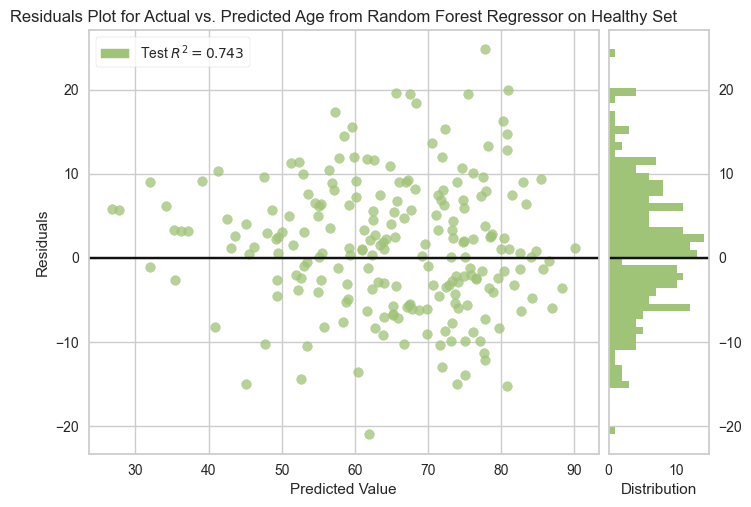

<Axes: title={'center': 'Residuals Plot for Actual vs. Predicted Age from Random Forest Regressor on Healthy Set'}, xlabel='Predicted Value', ylabel='Residuals'>

In [27]:
visualizer = ResidualsPlot(random_forest_regressor, title="Residuals Plot for Actual vs. Predicted Age from Random Forest Regressor on Healthy Set")

visualizer.score(X_test, y_test)
visualizer.show()

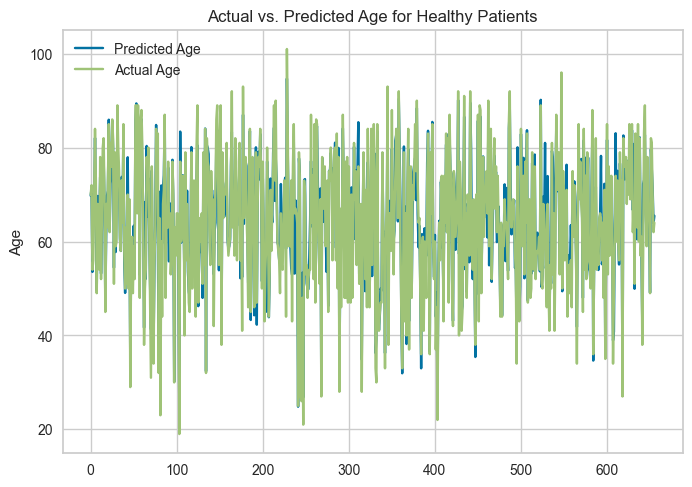

In [28]:
predictions = random_forest_regressor.predict(X)
plt.plot(predictions)
plt.plot(y)
plt.title("Actual vs. Predicted Age for Healthy Patients")
plt.ylabel('Age')
plt.legend(['Predicted Age', 'Actual Age'], loc='upper left')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

# Extract data from your 'data' object
X = data.dnam.transpose().values  # Transpose to have samples as rows and cpg sites as columns
y = data.metadata['age'].values

# Parameters for bootstrap and feature selection
n_bootstrap = 20
threshold = 0.05

# Store count of times each CpG site is deemed significant
cpg_counts = np.zeros(X.shape[1])

# Begin bootstrap iterations
for _ in range(n_bootstrap):
    # Sample with replacement from X, y
    sample_idx = np.random.choice(range(X.shape[0]), size=X.shape[0], replace=True)
    X_sample = X[sample_idx]
    y_sample = y[sample_idx]

    # Train model
    model = LinearRegression()
    model.fit(X_sample, y_sample)

    # Identify significant CpG sites (based on magnitude of coefficients)
    significant_cpgs = np.where(np.abs(model.coef_) > threshold)[0]
    cpg_counts[significant_cpgs] += 1

# Determine stable CpG sites
stable_cpg_sites = np.where(cpg_counts > n_bootstrap * 0.6)[0]
stable_cpg_names = data.dnam.index[stable_cpg_sites].tolist()

print(f"Stable CpG sites (associated with age in more than 60% of bootstrap samples): {stable_cpg_sites}")

In [ ]:
#Seperate data into training and test sets

df = data.dnam.transpose()
df['age'] = data.metadata['age']
top_sites_df = df[stable_cpg_names]

X = top_sites_df
y = df['age']

X= np.array(X)
y=np.array(y)
display(X)
display(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

In [ ]:
#Train a model using elastic net
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

model = ElasticNet(alpha=0.01, l1_ratio=0.3, max_iter=10000)
# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error on Test Data: {mse}")

In [ ]:
#Plot the results to see how good our model is
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='w', linewidth=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)  # y=x line for reference
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual Age vs. Predicted Age')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Calculate Mean Squared Error (MSE)
mse = np.mean((y_test - y_pred) ** 2)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test - y_pred))
print(f"Mean Absolute Error (MAE): {mae:.4f}")

In [ ]:
display(X_train)
display(X_train.shape)
x_train=np.array(X_train)
display(x_train)
display(x_train.shape)


Y_train=np.array(y_train)
display(Y_train)
display(Y_train.shape)
X_features=list(X_train)

display(X_features)

#feature_names=

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from xgboost import plot_importance
import xgboost as xgb



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
params = {
    'booster': 'gbtree',
    'objective': 'reg:gamma',
    'gamma': 0,
    'max_depth': 20,
    'lambda': 0.5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'slient': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
    'learning_rate': 0.1,
    'alpha': 0,
    'n_estimators': 10
}

dtrain = xgb.DMatrix(X_train,y_train)
num_rounds = 300
plst = list(params.items())
model = xgb.train(plst,dtrain,num_rounds)

dtest = xgb.DMatrix(X_test)
ans = model.predict(dtest)
print('mse:', mean_squared_error(y_test, ans))

plot_importance(model)
plt.show()

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

feature_importance = model.get_score(importance_type='weight')

# Convert feature importance to a sorted list of tuples
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Select the top 10 features
top_10_features = sorted_feature_importance[:50]

# If you want to display the top 10 features
for feature, importance in top_10_features:
    print(f"Feature: {feature}, Importance: {importance}")

# Optionally, you can plot these top 10 features
xgb.plot_importance(model, max_num_features=30)
plt.show()
